In [40]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [41]:
data_MNIST = keras.datasets.fashion_mnist

In [42]:
(X_train_full, Y_train_full), (X_test, Y_test) = data_MNIST.load_data()

In [43]:
class_names = ['T-shirt/Top', 'Trouser', 'Pulllover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

### Data Reshape (Preprocessing)

In [44]:
X_train_full.shape

(60000, 28, 28)

In [45]:
X_test.shape

(10000, 28, 28)

## Addition of a dimension as CNN takes input as 3d array

In [46]:
X_train_full = X_train_full.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

## Normalization Data

In [47]:
X_train_n = X_train_full / 255.0
X_test_n = X_test / 255.0

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_n, Y_train_full, random_state=42)

## Model Architecture

In [49]:
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
model = keras.models.Sequential()

#CNN
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='valid', activation='relu', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

#ANN
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))
 

In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [52]:
model.compile(loss = 'sparse_categorical_crossentropy',
optimizer = 'sgd',
metrics = ['accuracy'])

In [58]:
model_history = model.fit(X_train, Y_train, epochs = 30, validation_data=(X_valid, Y_valid), batch_size=64)

Epoch 1/30
704/704 [==============================] - 20s 28ms/step - loss: 0.2271 - accuracy: 0.9163 - val_loss: 0.2849 - val_accuracy: 0.8946
Epoch 2/30
704/704 [==============================] - 19s 28ms/step - loss: 0.2224 - accuracy: 0.9187 - val_loss: 0.3413 - val_accuracy: 0.8781
Epoch 3/30
704/704 [==============================] - 20s 29ms/step - loss: 0.2184 - accuracy: 0.9204 - val_loss: 0.2693 - val_accuracy: 0.9041
Epoch 4/30
704/704 [==============================] - 23s 32ms/step - loss: 0.2135 - accuracy: 0.9219 - val_loss: 0.3149 - val_accuracy: 0.8867
Epoch 5/30
704/704 [==============================] - 26s 37ms/step - loss: 0.2107 - accuracy: 0.9230 - val_loss: 0.4058 - val_accuracy: 0.8605
Epoch 6/30
704/704 [==============================] - 26s 37ms/step - loss: 0.2065 - accuracy: 0.9246 - val_loss: 0.2757 - val_accuracy: 0.9016
Epoch 7/30
704/704 [==============================] - 21s 30ms/step - loss: 0.2033 - accuracy: 0.9252 - val_loss: 0.2798 - val_accuracy:

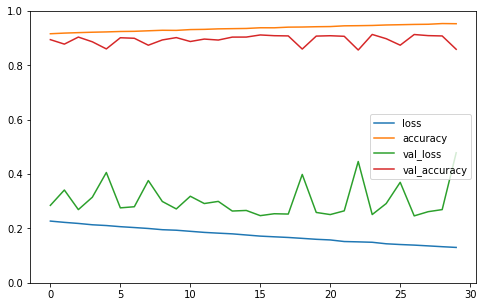

In [59]:
pd.DataFrame(model_history.history).plot(figsize = (8, 5))
plt.grid = True
plt.gca().set_ylim(0, 1)
plt.show()

In [60]:
ev = model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 124.3063 - accuracy: 0.7935
